In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("Transformed_data_22-24.csv")

In [2]:
# Filter out rows with "OTHER" in the Station_Cleaned column
df = df[df["Station_Cleaned"] != "OTHER"].copy()
df = df[df['Min Delay'] > 0].copy()



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24550 entries, 9 to 69067
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  24550 non-null  object
 1   Time                  24550 non-null  object
 2   Day                   24550 non-null  object
 3   Station               24550 non-null  object
 4   Code                  24550 non-null  object
 5   Code Description      24550 non-null  object
 6   Min Delay             24550 non-null  int64 
 7   Min Gap               24550 non-null  int64 
 8   Line                  24550 non-null  object
 9   Station_Part_Cleaned  24550 non-null  object
 10  Station_Cleaned       24550 non-null  object
 11  Code_Freq             24550 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.4+ MB


In [4]:
df['Station_Cleaned'].value_counts()

Station_Cleaned
BLOOR-YONGE STATION           1282
FINCH STATION                 1168
EGLINTON STATION              1064
ST GEORGE STATION             1022
KENNEDY STATION                945
                              ... 
LAWRENCE EAST STATION          117
SCARBOROUGH CENTRE STATION      93
BESSARION STATION               78
MIDLAND STATION                 65
ELLESMERE STATION               44
Name: count, Length: 70, dtype: int64

In [5]:
# Step 3: Filter only rows with actual delays
#delays_df = df[df["Min Delay"] > 0].copy()
delays_df = df

# Step 4: Group by station and calculate delay metrics
station_delay_summary = delays_df.groupby("Station_Cleaned").agg(
    Total_Incidents=("Min Delay", "count"),
    Total_Min_Delay=("Min Delay", "sum"),
    Avg_Delay_Per_Incident=("Min Delay", "mean")
).sort_values(by="Total_Incidents", ascending=False)

# Step 5: Round average delay
station_delay_summary["Avg_Delay_Per_Incident"] = station_delay_summary["Avg_Delay_Per_Incident"].round(2)

# Step 6: Display top 15 stations with most delay incidents
station_delay_summary.head(5)

,Total_Incidents,Total_Min_Delay,Avg_Delay_Per_Incident
Station_Cleaned,,,
BLOOR-YONGE STATION,1282,9949,7.76
FINCH STATION,1168,6744,5.77
EGLINTON STATION,1064,6658,6.26
ST GEORGE STATION,1022,7506,7.34
KENNEDY STATION,945,6119,6.48


Available station names (sample): ['BLOOR-YONGE STATION', 'FINCH STATION', 'EGLINTON STATION', 'ST GEORGE STATION', 'KENNEDY STATION', 'KIPLING STATION', 'WILSON STATION', 'VAUGHAN MC STATION', 'SPADINA STATION', 'DAVISVILLE STATION']


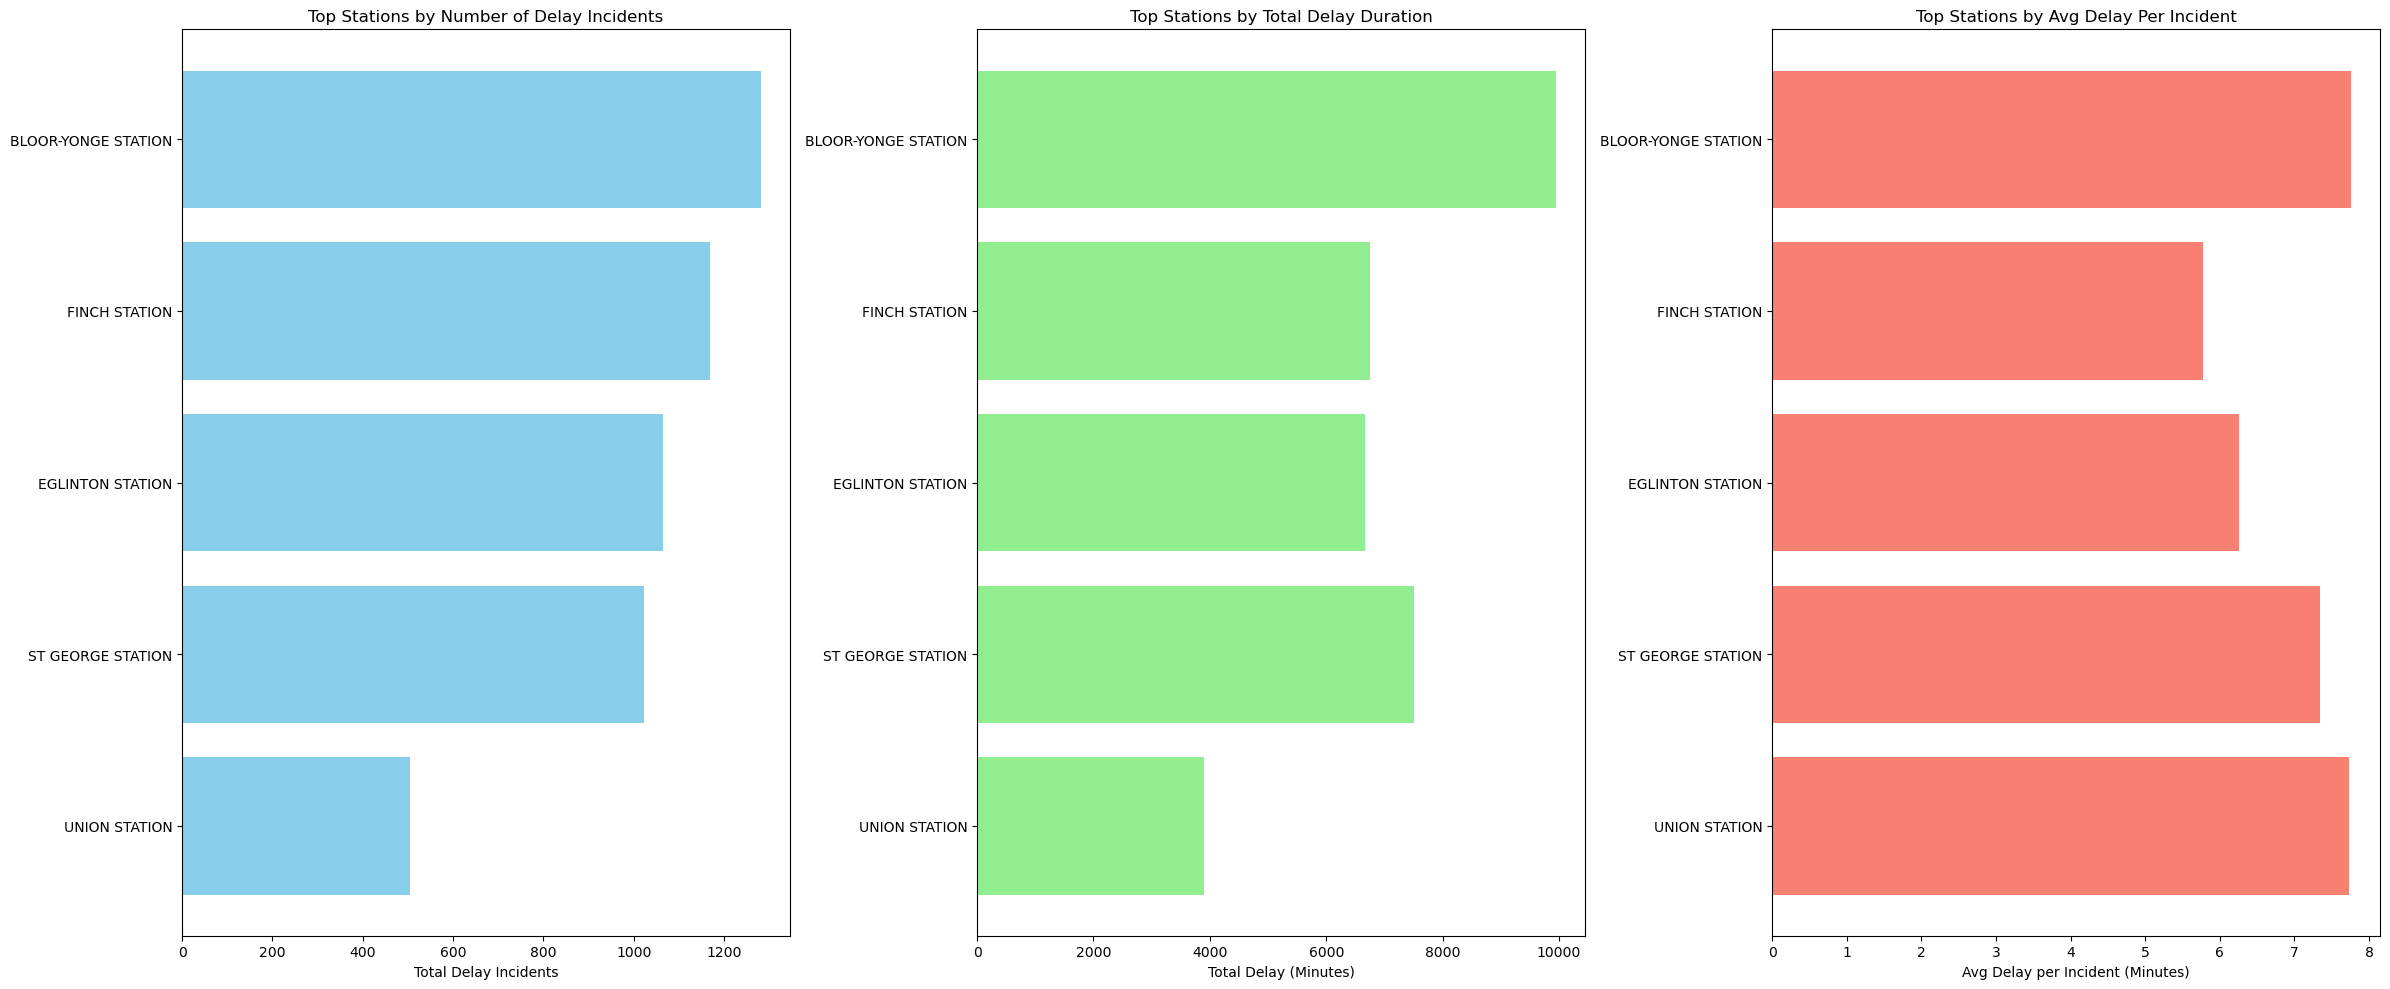

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get top 4 stations by Total_Incidents
top4 = station_delay_summary.sort_values(by="Total_Incidents", ascending=False).head(4)

# Step 2: Check UNION STATION's presence and spelling
print("Available station names (sample):", station_delay_summary.index.tolist()[:10])  # See what's in the index

# Use exact name match — correct to what your index actually says (e.g., "UNION STATION")
union_name = "UNION STATION"  # <-- Update this if your data uses something like "UNION"

# Step 3: Add UNION if it's not already in top4
if union_name not in top4.index:
    try:
        union_row = station_delay_summary.loc[[union_name]]
        stations_to_plot = pd.concat([top4, union_row])
    except KeyError:
        print(f"'{union_name}' not found in station_delay_summary index.")
        stations_to_plot = top4.copy()
else:
    stations_to_plot = top4.copy()

# Step 4: Plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 10))
stations_reversed = stations_to_plot.index[::-1]

# Total Incidents
axes[0].barh(stations_reversed, stations_to_plot.loc[stations_reversed]["Total_Incidents"], color='skyblue')
axes[0].set_xlabel("Total Delay Incidents")
axes[0].set_title("Top Stations by Number of Delay Incidents")

# Total Delay
axes[1].barh(stations_reversed, stations_to_plot.loc[stations_reversed]["Total_Min_Delay"], color='lightgreen')
axes[1].set_xlabel("Total Delay (Minutes)")
axes[1].set_title("Top Stations by Total Delay Duration")

# Avg Delay
axes[2].barh(stations_reversed, stations_to_plot.loc[stations_reversed]["Avg_Delay_Per_Incident"], color='salmon')
axes[2].set_xlabel("Avg Delay per Incident (Minutes)")
axes[2].set_title("Top Stations by Avg Delay Per Incident")


# Save before showing
plt.tight_layout()
plt.savefig("top_stations_with_delays.png", dpi=300, bbox_inches='tight')  # Save first
plt.show()  # Then show


In [25]:
df = df[df['Line'] != 'YU-BD'].copy()


C:\Users\Sneha Gupta\AppData\Local\Temp\ipykernel_14480\237407777.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_avg_delay.values, y=line_avg_delay.index, palette="viridis")


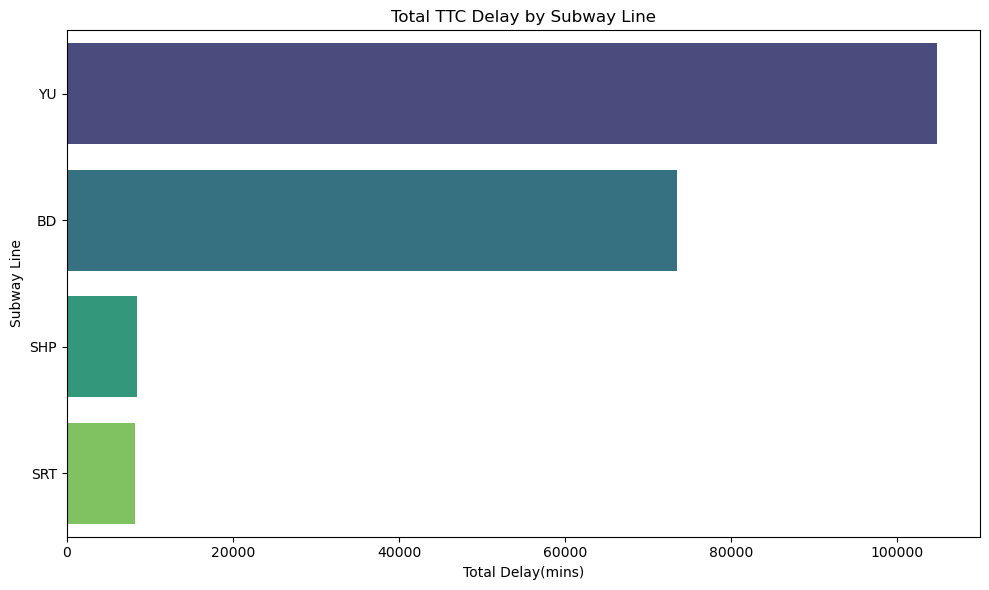

In [28]:
import seaborn as sns

# Group by line and calculate average delay
line_avg_delay = df.groupby("Line")["Min Delay"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=line_avg_delay.values, y=line_avg_delay.index, palette="viridis")

plt.xlabel("Total Delay(mins)")
plt.ylabel("Subway Line")
plt.title("Total TTC Delay by Subway Line")
plt.tight_layout()
plt.savefig("Total TTC delay per Line.png", dpi=300, bbox_inches='tight')
plt.show()


# do for sum, count, average for lines!

In [29]:
# Ensure uniform formatting
df['Line'] = df['Line'].str.upper().str.strip()

# Filter for YU-BD line
yu_bd_total_delay = df[df['Line'] == 'YU-BD']['Min Delay'].sum()

print("Total Min Delay for YU-BD line:", yu_bd_total_delay, "minutes")


Total Min Delay for YU-BD line: 0 minutes


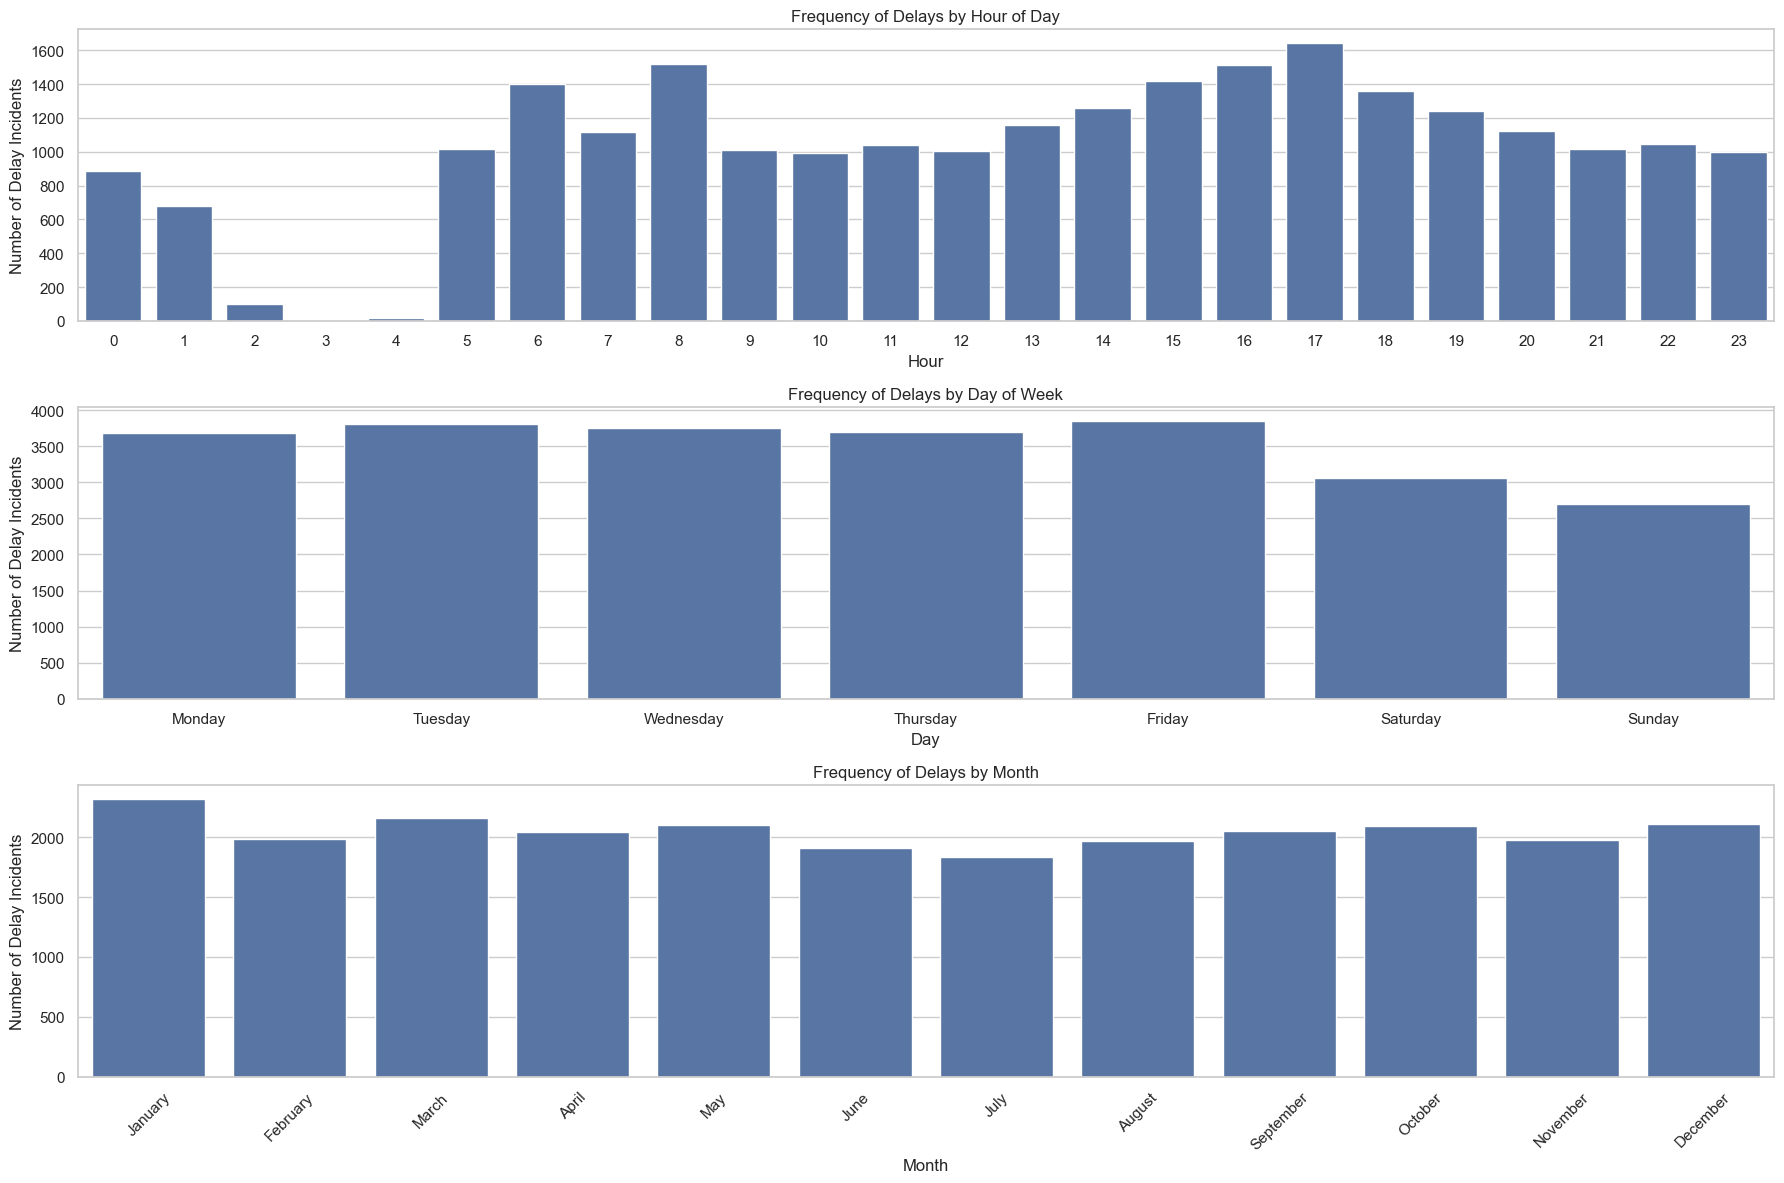

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Ensure datetime columns are parsed correctly
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Start plotting
plt.figure(figsize=(18, 12))

# 1️⃣ Frequency of Delays by Hour
plt.subplot(3, 1, 1)
sns.countplot(data=df, x='Hour', order=sorted(df['Hour'].dropna().unique()))
plt.title("Frequency of Delays by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Delay Incidents")

# 2️⃣ Frequency of Delays by Day of Week
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='Day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Frequency of Delays by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Delay Incidents")

# 3️⃣ Frequency of Delays by Month
plt.subplot(3, 1, 3)
sns.countplot(data=df, x='Month', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Frequency of Delays by Month")
plt.xlabel("Month")
plt.ylabel("Number of Delay Incidents")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Delays by Hour, Dat, Month.png", dpi=300, bbox_inches='tight')
plt.show()


In [2]:

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Optional: for better visuals
# sns.set(style="whitegrid")

# # If not already parsed
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
# df['Month'] = df['Date'].dt.month_name()
# df['Day'] = df['Date'].dt.day_name()

# # Set figure size
# plt.figure(figsize=(16, 12))

# # 1️⃣ Delays by Month
# plt.subplot(3, 1, 1)
# sns.barplot(data=df, x='Month', y='Min Delay', estimator='mean', order=[
#     'January', 'February', 'March', 'April', 'May', 'June',
#     'July', 'August', 'September', 'October', 'November', 'December'
# ])
# plt.title('Average Delay by Month')
# plt.xticks(rotation=45)

# # 2️⃣ Delays by Day of Week
# plt.subplot(3, 1, 2)
# sns.barplot(data=df, x='Day', y='Min Delay', estimator='mean', order=[
#     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
# ])
# plt.title('Average Delay by Day of Week')
# plt.xticks(rotation=45)

# # 3️⃣ Delays by Hour of Day
# plt.subplot(3, 1, 3)
# sns.barplot(data=df, x='Hour', y='Min Delay', estimator='mean')
# plt.title('Average Delay by Hour')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()


In [1]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Ensure datetime columns are parsed properly
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
# df['Day'] = df['Date'].dt.day_name()
# df['Month'] = df['Date'].dt.month_name()

# # Standardize station names
# df['Station'] = df['Station'].str.upper().str.strip()

# # Filter for one station
# station_name = "BLOOR STATION"
# df_station = df[df['Station'] == station_name]

# # Plot 1️⃣: Average Delay by Hour
# plt.figure(figsize=(14, 4))
# sns.barplot(data=df_station, x='Hour', y='Min Delay', estimator='mean')
# plt.title(f"Average Delay by Hour – {station_name.title()}")
# plt.ylabel("Avg Delay (mins)")
# plt.xlabel("Hour of Day")
# plt.tight_layout()
# plt.show()

# # Plot 2️⃣: Average Delay by Day of Week
# plt.figure(figsize=(14, 4))
# sns.barplot(data=df_station, x='Day', y='Min Delay', estimator='mean',
#             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.title(f"Average Delay by Day – {station_name.title()}")
# plt.ylabel("Avg Delay (mins)")
# plt.xlabel("Day of Week")
# plt.tight_layout()
# plt.show()

# # Plot 3️⃣: Average Delay by Month
# plt.figure(figsize=(14, 4))
# sns.barplot(data=df_station, x='Month', y='Min Delay', estimator='mean',
#             order=['January', 'February', 'March', 'April', 'May', 'June',
#                    'July', 'August', 'September', 'October', 'November', 'December'])
# plt.title(f"Average Delay by Month – {station_name.title()}")
# plt.ylabel("Avg Delay (mins)")
# plt.xlabel("Month")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [33]:
# Group and count occurrences
code_counts = df.groupby(['Station_Cleaned', 'Code']).size().reset_index(name='Count')

# Rank within each station
code_counts['Rank'] = code_counts.groupby('Station_Cleaned')['Count'].rank(method='first', ascending=False)

# Keep only top 3 codes
top3 = code_counts[code_counts['Rank'] <= 3]



In [34]:
# Create a combined label with both code and count (optional)
top3['Code_Count'] = top3['Code'] + ' (' + top3['Count'].astype(str) + ')'

# Pivot using combined label
pivot_combined = top3.pivot(index='Station_Cleaned', columns='Rank', values='Code_Count')
pivot_combined.columns = [f'Top_{int(col)}' for col in pivot_combined.columns]
pivot_combined.head()



C:\Users\Sneha Gupta\AppData\Local\Temp\ipykernel_14480\2285041742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['Code_Count'] = top3['Code'] + ' (' + top3['Count'].astype(str) + ')'


,Top_1,Top_2,Top_3
Station_Cleaned,,,
BATHURST STATION,SUDP (41),MUIR (22),SUO (14)
BAY STATION,SUDP (38),MUPAA (19),SUUT (17)
BAYVIEW STATION,PUOPO (28),SUDP (13),MUPAA (9)
BESSARION STATION,PUOPO (17),TUMVS (7),TUOS (6)
BLOOR-YONGE STATION,SUDP (268),MUPAA (158),SUO (135)


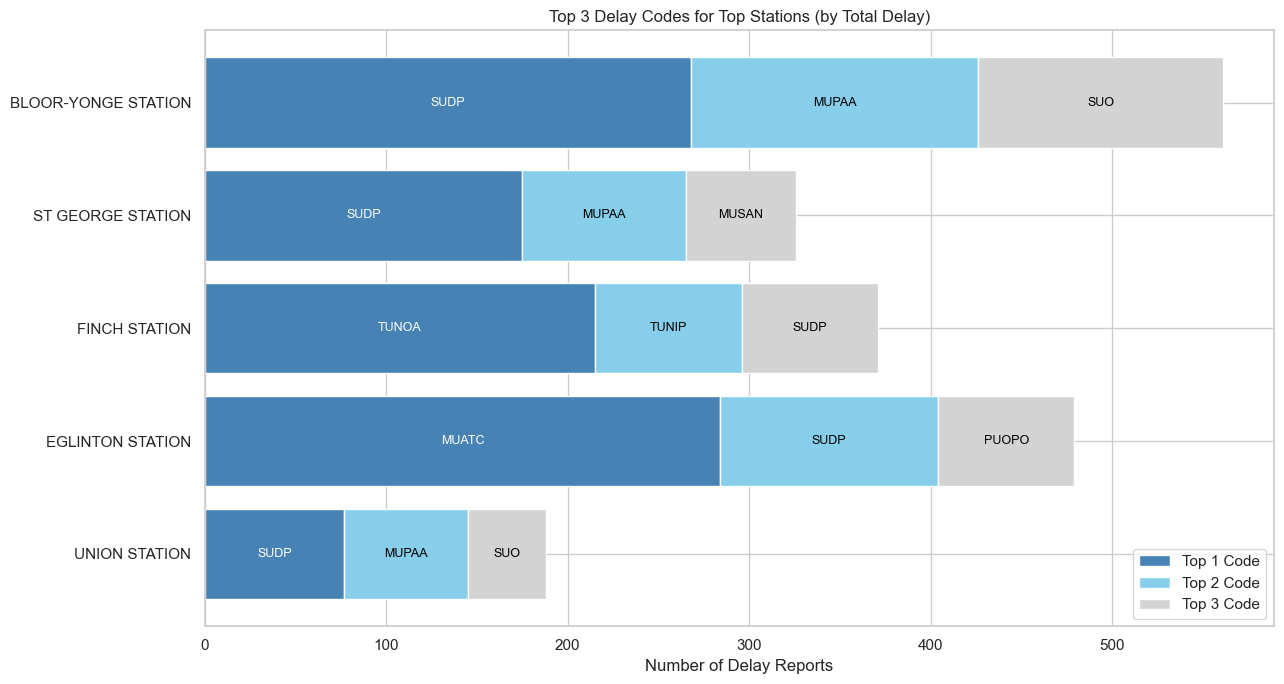

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Total delay per station
total_min_delay = df.groupby('Station_Cleaned')['Min Delay'].sum().reset_index()
total_min_delay.columns = ['Station_Cleaned', 'Total_Minutes_Delayed']

# STEP 2: Get top 4 stations
top4_stations = total_min_delay.sort_values('Total_Minutes_Delayed', ascending=False).head(4)

# STEP 3: Add UNION STATION if not in top 4
union_name = "UNION STATION"
if union_name not in top4_stations['Station_Cleaned'].values:
    try:
        union_row = total_min_delay[total_min_delay['Station_Cleaned'] == union_name]
        top_stations = pd.concat([top4_stations, union_row])
    except:
        print("UNION STATION not found.")
        top_stations = top4_stations.copy()
else:
    top_stations = top4_stations.copy()

# Sort for plotting
top_stations_sorted = top_stations.sort_values('Total_Minutes_Delayed', ascending=True)

# STEP 4: Filter data for these stations
df_top = df[df['Station_Cleaned'].isin(top_stations_sorted['Station_Cleaned'])]

# STEP 5: Top 3 frequent codes per station
code_counts = df_top.groupby(['Station_Cleaned', 'Code']).size().reset_index(name='Count')
code_counts['Rank'] = code_counts.groupby('Station_Cleaned')['Count'].rank(method='first', ascending=False)
top3_codes = code_counts[code_counts['Rank'] <= 3].sort_values(['Station_Cleaned', 'Rank'])

# STEP 6: Pivot counts and codes
pivot_counts = top3_codes.pivot(index='Station_Cleaned', columns='Rank', values='Count')
pivot_counts.columns = ['Top1_Count', 'Top2_Count', 'Top3_Count']
pivot_counts = pivot_counts.fillna(0)

pivot_codes = top3_codes.pivot(index='Station_Cleaned', columns='Rank', values='Code')
pivot_codes.columns = ['Top1_Code', 'Top2_Code', 'Top3_Code']

# STEP 7: Merge all
plot_df = pd.concat([pivot_counts, pivot_codes], axis=1)
plot_df = plot_df.merge(top_stations_sorted, on='Station_Cleaned')
plot_df = plot_df.sort_values('Total_Minutes_Delayed', ascending=True)
stations = plot_df['Station_Cleaned'].tolist()

# STEP 8: Plot
fig, ax = plt.subplots(figsize=(13, 7))

bar1 = ax.barh(stations, plot_df['Top1_Count'], color='steelblue', label='Top 1 Code')
bar2 = ax.barh(stations, plot_df['Top2_Count'], left=plot_df['Top1_Count'], color='skyblue', label='Top 2 Code')
bar3 = ax.barh(stations, plot_df['Top3_Count'], left=plot_df['Top1_Count'] + plot_df['Top2_Count'], color='lightgray', label='Top 3 Code')

# Add labels inside bars
for i, (b1, b2, b3) in enumerate(zip(bar1, bar2, bar3)):
    c1 = plot_df.iloc[i]['Top1_Code']
    c2 = plot_df.iloc[i]['Top2_Code']
    c3 = plot_df.iloc[i]['Top3_Code']
    ax.text(b1.get_width()/2, b1.get_y() + b1.get_height()/2, c1, ha='center', va='center', color='white', fontsize=9)
    ax.text(b1.get_width() + b2.get_width()/2, b2.get_y() + b2.get_height()/2, c2, ha='center', va='center', color='black', fontsize=9)
    ax.text(b1.get_width() + b2.get_width() + b3.get_width()/2, b3.get_y() + b3.get_height()/2, c3, ha='center', va='center', color='black', fontsize=9)

# Final touches
ax.set_xlabel("Number of Delay Reports")
ax.set_title("Top 3 Delay Codes for Top Stations (by Total Delay)")
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("Top3DelayCodesForTopStations", dpi=300, bbox_inches='tight')
plt.show()


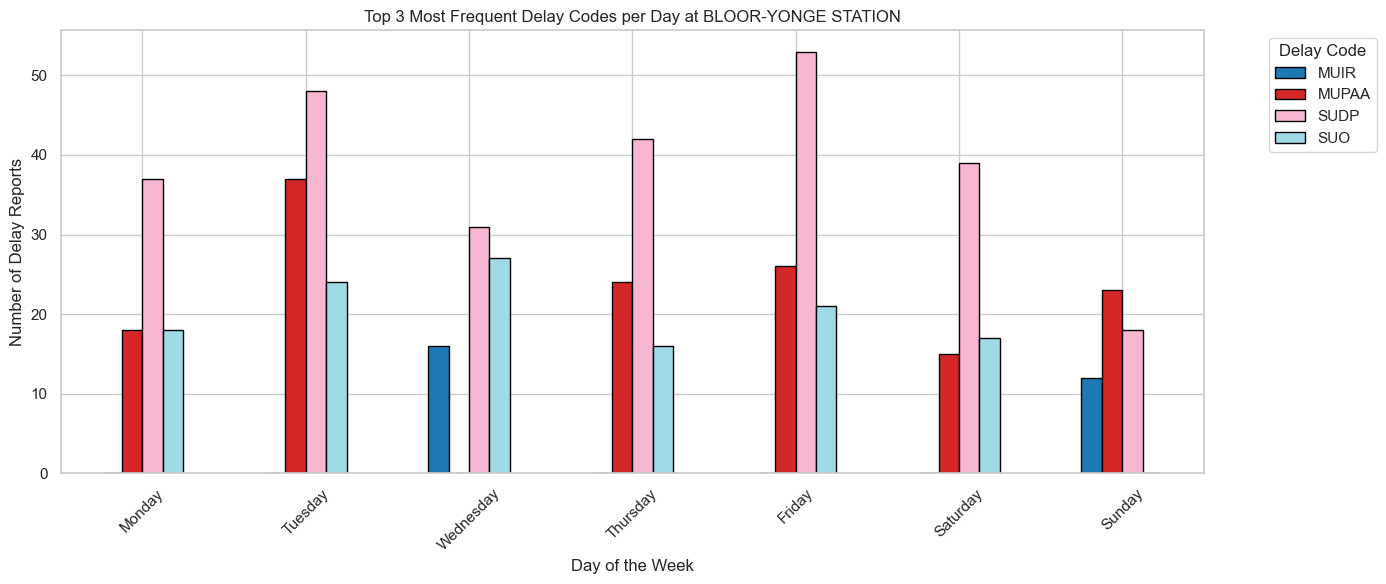

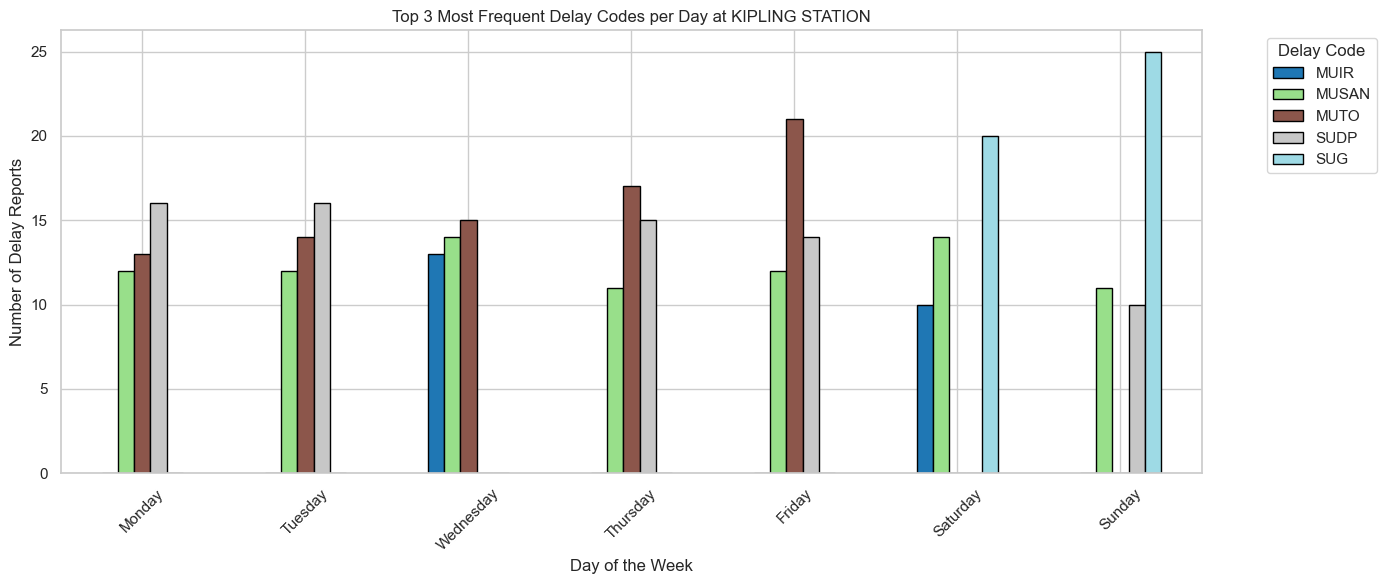

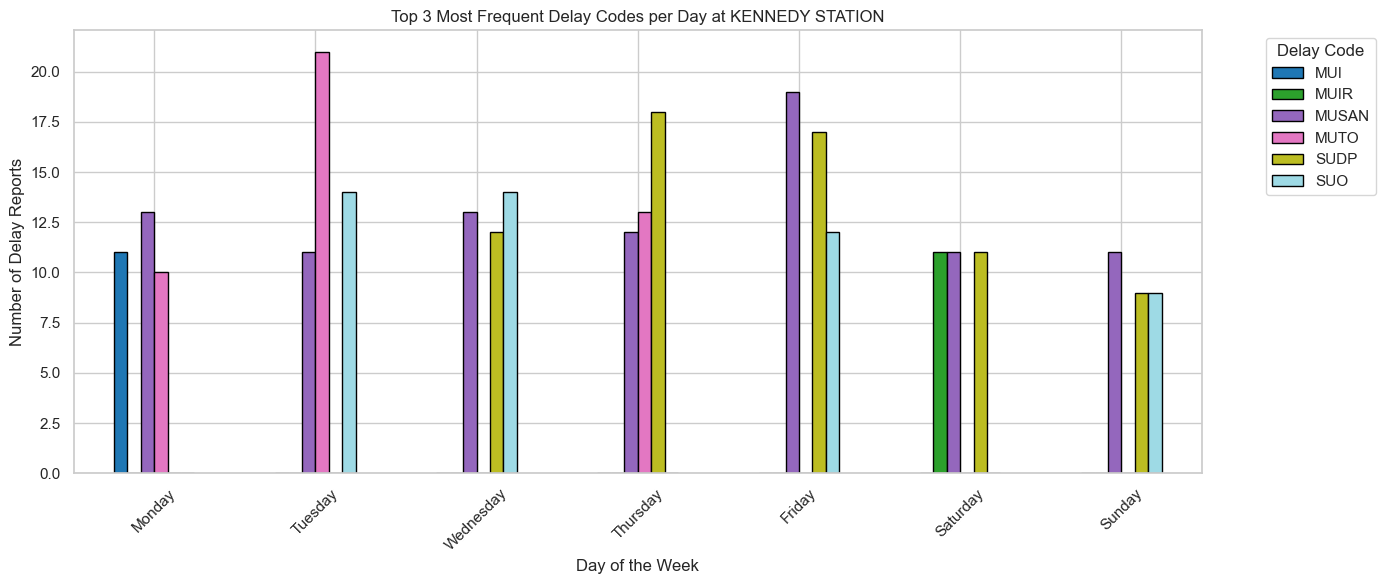

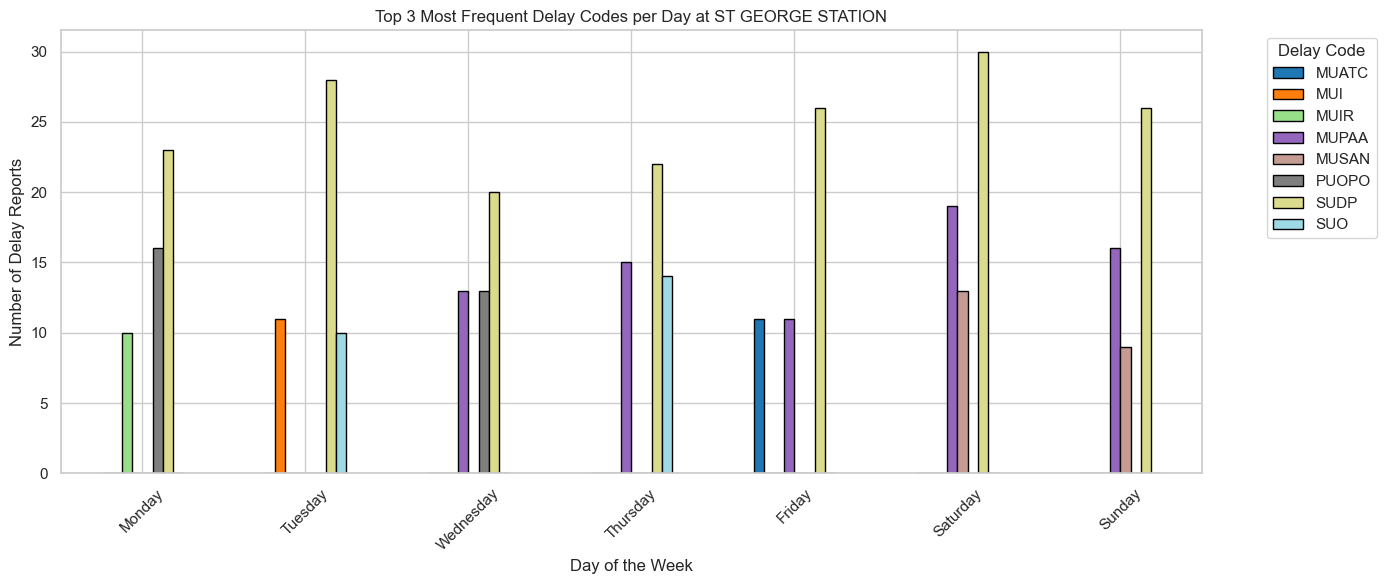

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Ensure 'Date' is in datetime and extract weekday name
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()

# STEP 2: Define target stations and weekday order
stations = ['BLOOR-YONGE STATION', 'KIPLING STATION', 'KENNEDY STATION', 'ST GEORGE STATION']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# STEP 3: Define plotting function
def plot_top3_codes_by_weekday(station_name):
    df_station = df[df['Station_Cleaned'] == station_name].copy()

    # Group by Weekday and Code, count occurrences
    code_counts = df_station.groupby(['Weekday', 'Code']).size().reset_index(name='Count')

    # Get top 3 codes per weekday
    code_counts['Rank'] = code_counts.groupby('Weekday')['Count'].rank(method='first', ascending=False)
    top3 = code_counts[code_counts['Rank'] <= 3]

    # Pivot to wide format
    pivot_data = top3.pivot_table(index='Weekday', columns='Code', values='Count', fill_value=0)

    # Reorder weekdays
    pivot_data = pivot_data.reindex(weekday_order)

    # Plot
    pivot_data.plot(kind='bar', figsize=(14, 6), colormap='tab20', edgecolor='black')
    plt.title(f"Top 3 Most Frequent Delay Codes per Day at {station_name}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Delay Reports")
    plt.xticks(rotation=45)
    plt.legend(title="Delay Code", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# STEP 4: Loop through each station and plot
for station in stations:
    plot_top3_codes_by_weekday(station)


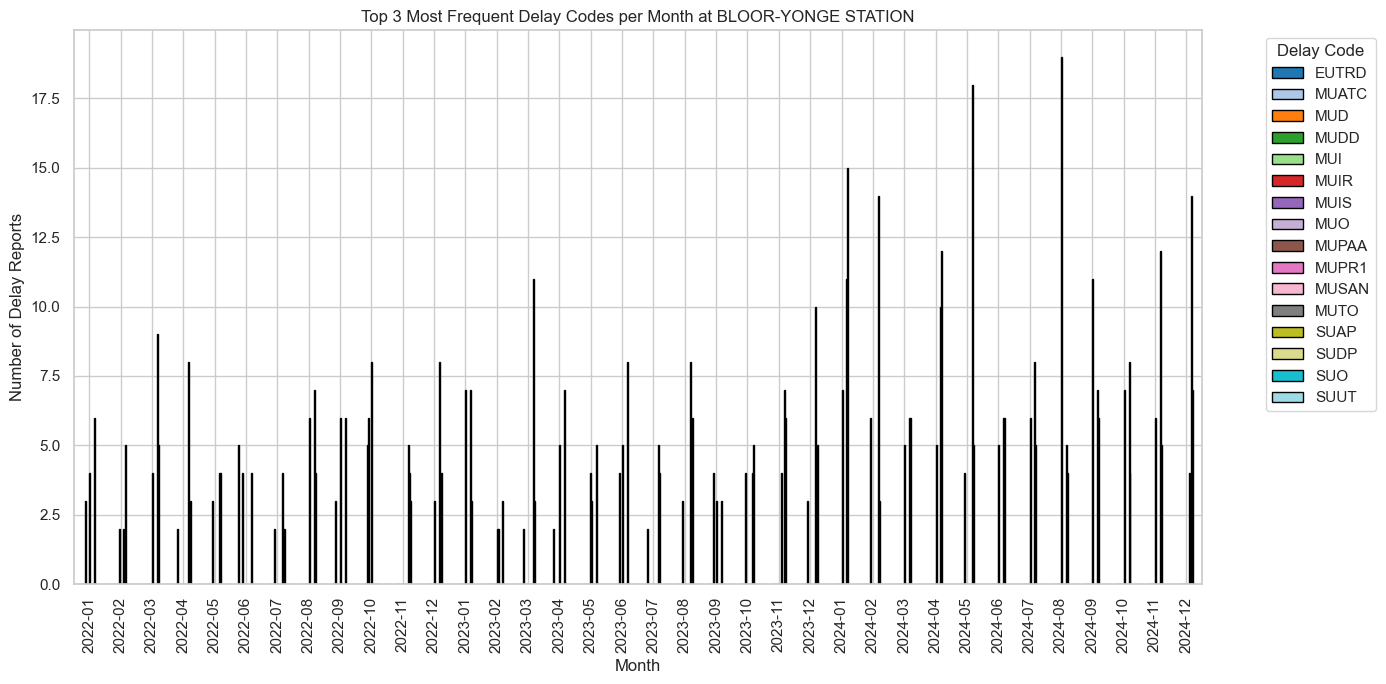

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Filter for Bloor-Yonge
df_bloor = df[df['Station_Cleaned'] == 'BLOOR-YONGE STATION'].copy()

# STEP 2: Convert Date to datetime and extract Month-Year
df_bloor['Date'] = pd.to_datetime(df_bloor['Date'], errors='coerce')
df_bloor['Month'] = df_bloor['Date'].dt.to_period('M').astype(str)

# STEP 3: Group by Month and Code → Count occurrences
monthly_code_counts = df_bloor.groupby(['Month', 'Code']).size().reset_index(name='Count')

# STEP 4: For each month, get top 3 codes
monthly_code_counts['Rank'] = monthly_code_counts.groupby('Month')['Count'].rank(method='first', ascending=False)
top3_monthly = monthly_code_counts[monthly_code_counts['Rank'] <= 3]

# STEP 5: Pivot for plotting
plot_data = top3_monthly.pivot_table(index='Month', columns='Code', values='Count', fill_value=0)

# Optional: Keep only months in order
plot_data = plot_data.sort_index()

# STEP 6: Plot
plot_data.plot(kind='bar', figsize=(14, 7), colormap='tab20', edgecolor='black')

plt.title("Top 3 Most Frequent Delay Codes per Month at BLOOR-YONGE STATION")
plt.xlabel("Month")
plt.ylabel("Number of Delay Reports")
plt.legend(title="Delay Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


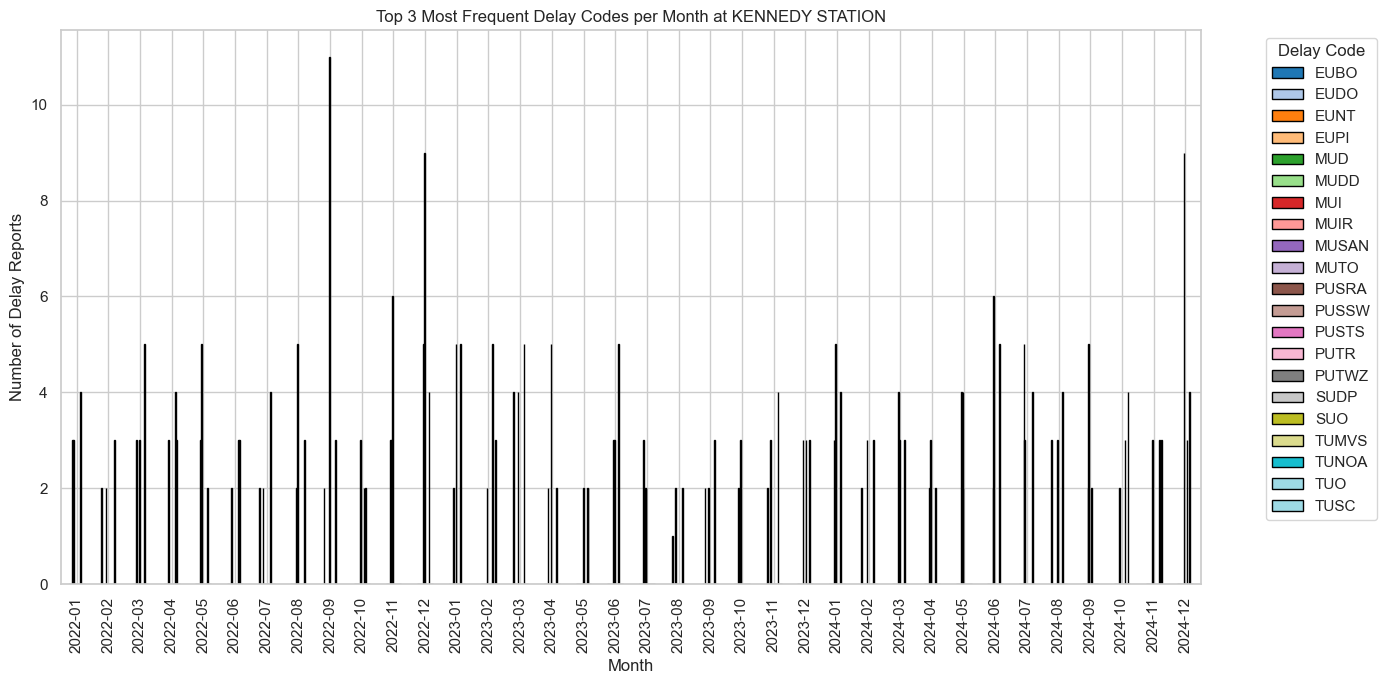

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Filter for Kennedy
df_kennedy = df[df['Station_Cleaned'] == 'KENNEDY STATION'].copy()

# STEP 2: Convert Date to datetime and extract Month-Year
df_kennedy['Date'] = pd.to_datetime(df_kennedy['Date'], errors='coerce')
df_kennedy['Month'] = df_kennedy['Date'].dt.to_period('M').astype(str)

# STEP 3: Group by Month and Code → Count occurrences
monthly_code_counts = df_kennedy.groupby(['Month', 'Code']).size().reset_index(name='Count')

# STEP 4: For each month, get top 3 codes
monthly_code_counts['Rank'] = monthly_code_counts.groupby('Month')['Count'].rank(method='first', ascending=False)
top3_monthly = monthly_code_counts[monthly_code_counts['Rank'] <= 3]

# STEP 5: Pivot for plotting
plot_data = top3_monthly.pivot_table(index='Month', columns='Code', values='Count', fill_value=0)
plot_data = plot_data.sort_index()

# STEP 6: Plot
plot_data.plot(kind='bar', figsize=(14, 7), colormap='tab20', edgecolor='black')

plt.title("Top 3 Most Frequent Delay Codes per Month at KENNEDY STATION")
plt.xlabel("Month")
plt.ylabel("Number of Delay Reports")
plt.legend(title="Delay Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


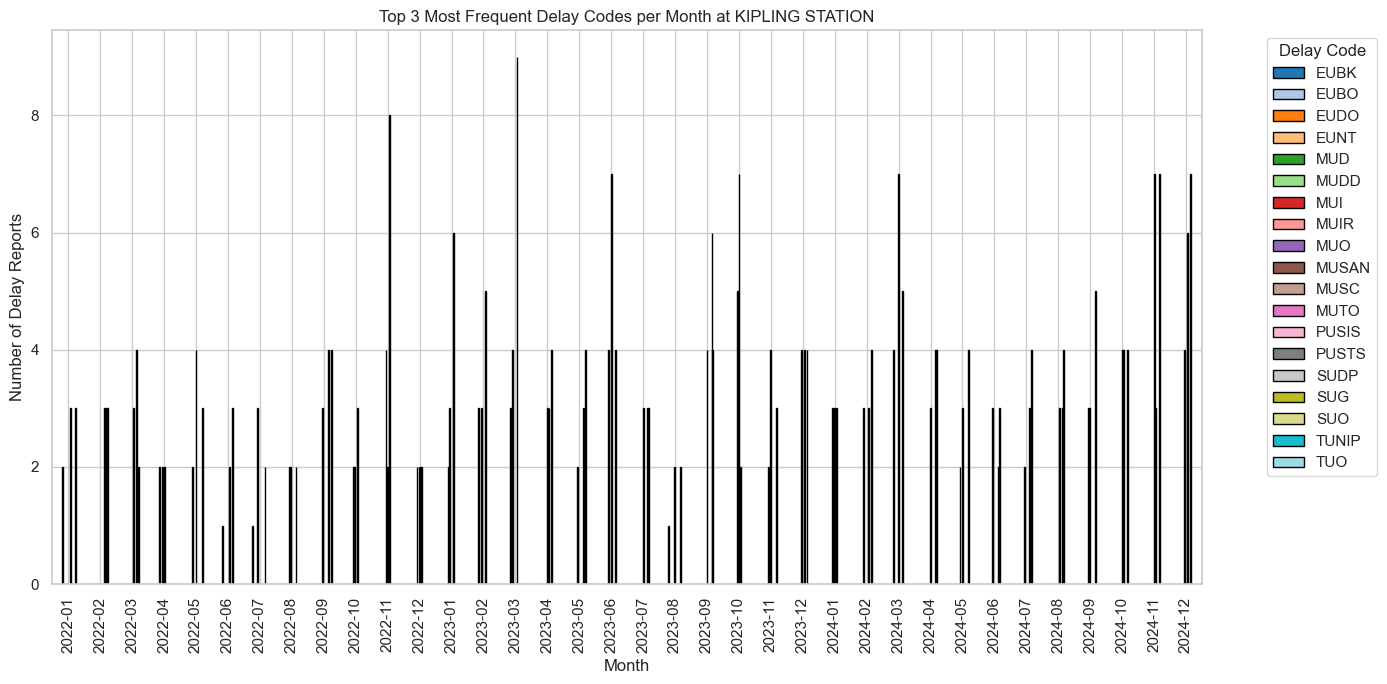

In [42]:
# Filter for Kipling
df_kipling = df[df['Station_Cleaned'] == 'KIPLING STATION'].copy()

# Convert Date and extract Month
df_kipling['Date'] = pd.to_datetime(df_kipling['Date'], errors='coerce')
df_kipling['Month'] = df_kipling['Date'].dt.to_period('M').astype(str)

# Group and rank
monthly_code_counts = df_kipling.groupby(['Month', 'Code']).size().reset_index(name='Count')
monthly_code_counts['Rank'] = monthly_code_counts.groupby('Month')['Count'].rank(method='first', ascending=False)
top3_monthly = monthly_code_counts[monthly_code_counts['Rank'] <= 3]

# Pivot for plotting
plot_data = top3_monthly.pivot_table(index='Month', columns='Code', values='Count', fill_value=0).sort_index()

# Plot
plot_data.plot(kind='bar', figsize=(14, 7), colormap='tab20', edgecolor='black')
plt.title("Top 3 Most Frequent Delay Codes per Month at KIPLING STATION")
plt.xlabel("Month")
plt.ylabel("Number of Delay Reports")
plt.legend(title="Delay Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


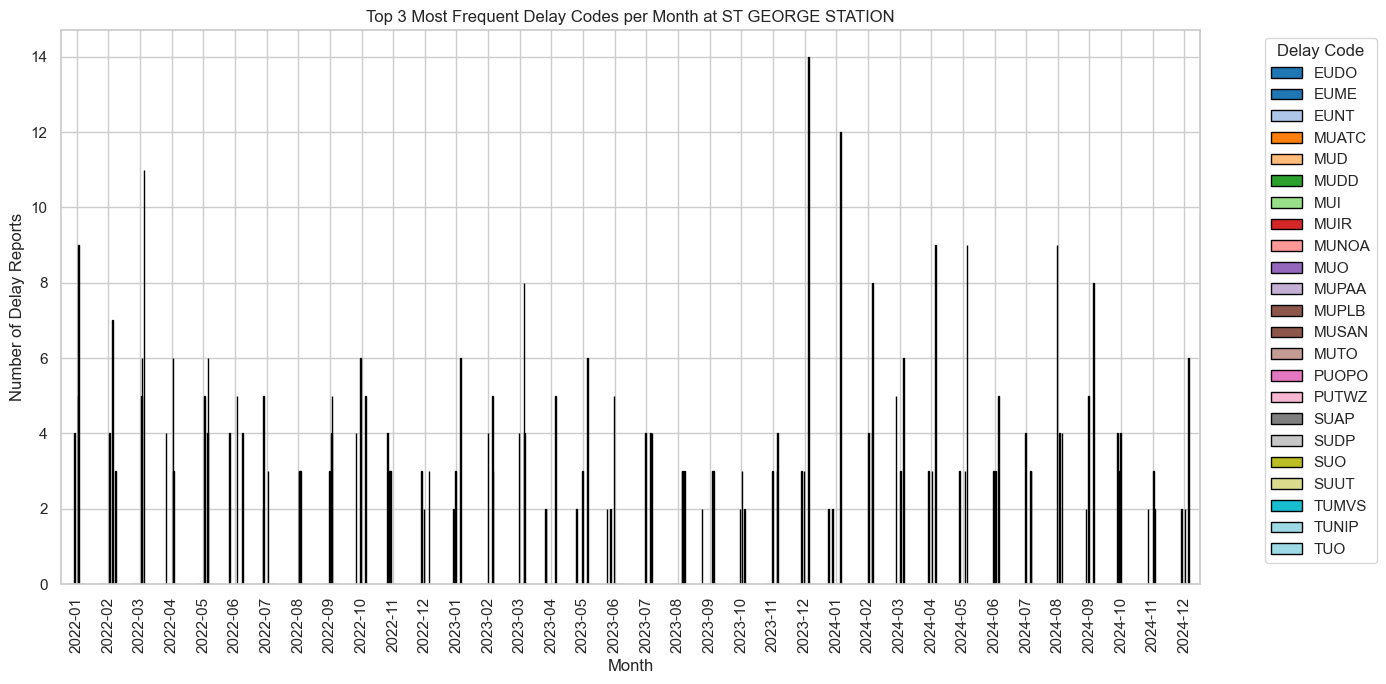

In [43]:
# Filter for St George
df_stgeorge = df[df['Station_Cleaned'] == 'ST GEORGE STATION'].copy()

# Convert Date and extract Month
df_stgeorge['Date'] = pd.to_datetime(df_stgeorge['Date'], errors='coerce')
df_stgeorge['Month'] = df_stgeorge['Date'].dt.to_period('M').astype(str)

# Group and rank
monthly_code_counts = df_stgeorge.groupby(['Month', 'Code']).size().reset_index(name='Count')
monthly_code_counts['Rank'] = monthly_code_counts.groupby('Month')['Count'].rank(method='first', ascending=False)
top3_monthly = monthly_code_counts[monthly_code_counts['Rank'] <= 3]

# Pivot for plotting
plot_data = top3_monthly.pivot_table(index='Month', columns='Code', values='Count', fill_value=0).sort_index()

# Plot
plot_data.plot(kind='bar', figsize=(14, 7), colormap='tab20', edgecolor='black')
plt.title("Top 3 Most Frequent Delay Codes per Month at ST GEORGE STATION")
plt.xlabel("Month")
plt.ylabel("Number of Delay Reports")
plt.legend(title="Delay Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
